## Getting started
As PyCoTools only provides an alternative interface into some of COPASI's tasks, if you are unfamiliar with `COPASI <http://copasi.org/>`_ then it is a good idea to become acquainted, prior to proceeding. As much as possible, arguments to PyCoTools functions follow the corresponding option in the COPASI user interface.

In addition to COPASI, PyCoTools depends on `tellurium <http://tellurium.analogmachine.org/>`_ which is a Python package for modelling biological systems. While tellurium and COPASI have some of the same features, generally they are complementary and productivity is enhanced by using both together.

More specifically, tellurium uses `antimony strings <http://tellurium.analogmachine.org/antimony-tutorial/>`_ to define a model which is then converted into SBML. PyCoTools provides the :class:`model.BuildAntimony` class which is a wrapper around this tellurium feature, which creates a Copasi model and parses it into a PyCoTools :class:`model.Model`

Since antimony is described `elsewhere <http://tellurium.analogmachine.org/antimony-tutorial/>`_ we will focus here on using antimony to build a copasi model.


### Build a model with antimony

In [6]:
import site, os
site.addsitedir('D:\pycotools3')
from pycotools3 import model

working_directory = os.path.abspath('')
copasi_filename = os.path.join(working_directory, 'NegativeFeedbackModel.cps')
antimony_string =  '''
    model negative_feedback()
        // define compartments
        compartment cell = 1.0
        //define species
        var A in cell
        var B in cell
        //define some global parameter for use in reactions
        vAProd = 0.1
        kADeg = 0.2
        kBProd = 0.3
        kBDeg = 0.4
        //define initial conditions
        A = 0
        B = 0
        //define reactions
        AProd: => A; cell*vAProd
        ADeg: A =>; cell*kADeg*A*B
        BProd: => B; cell*kBProd*A
        BDeg: B => ; cell*kBDeg*B
    end
    '''
with model.BuildAntimony(copasi_filename) as loader:
    negative_feedback = loader.load(antimony_string)
print(negative_feedback)
assert os.path.isfile(copasi_filename)

Model(name=negative_feedback, time_unit=s, volume_unit=l, quantity_unit=mol)


### Create an antmiony string from an existing model
The Copasi user interface is an excellant way of constructing a model and it is easy to convert this model into an antimony string that can be pasted into a document.

In [8]:
print(negative_feedback.to_antimony())

// Created by libAntimony v2.9.4
function Constant_flux__irreversible(v)
  v;
end

function Function_for_ADeg(A, B, kADeg)
  kADeg*A*B;
end

function Function_for_BProd(A, kBProd)
  kBProd*A;
end


model *negative_feedback()

  // Compartments and Species:
  compartment cell;
  species A in cell, B in cell;

  // Reactions:
  AProd:  => A; cell*Constant_flux__irreversible(vAProd);
  ADeg: A => ; cell*Function_for_ADeg(A, B, kADeg);
  BProd:  => B; cell*Function_for_BProd(A, kBProd);
  BDeg: B => ; cell*kBDeg*B;

  // Species initializations:
  A = 0;
  B = 0;

  // Compartment initializations:
  cell = 1;

  // Variable initializations:
  vAProd = 0.1;
  kADeg = 0.2;
  kBProd = 0.3;
  kBDeg = 0.4;

  // Other declarations:
  const cell, vAProd, kADeg, kBProd, kBDeg;
end



One paradigm of model development is to use antimony to 'hard code' perminent changes to the model and the Copasi user interface for experimental changes. The `Model.open()` method is useful for this paradigm as it opens the model with whatever configurations have been defined.

In [10]:
## negative_feedback.open()

cmd D:\pycotools3\pycotools3\COPASI\windows\CopasiUI.exe "D:\pycotools3\docs\source\NegativeFeedbackModel.cps"


### Simulate a time course

Since we have used an antimony string, we can simulate this model with either tellurium or Copasi. Simulating with tellurium uses a library called roadrunner which is described in detail `elsewhere <https://libroadrunner.readthedocs.io/en/latest/integration.html>`_. To run a simulation with Copasi we need to configure the time course task, make the task executable (i.e. tick the check box in the top right of the time course task) and run the simulation with CopasiSE. This is all taken care of by the :class:`tasks.TimeCourse` class.


In [15]:
from pycotools3 import tasks
time_course = tasks.TimeCourse(negative_feedback, end=100, step_size=1, intervals=100)
time_course


The results are saved in a file defined by the :code:`report_name` option, which defaults to :code:`timecourse.txt` in the same directory as the copasi model.

### Visualise a time course
PyCoTools also provides facilities for visualising simulation output. To plot a timecourse, pass the :class:`task.TimeCourse` object to the :class:`viz.PlotTimeCourse` object.


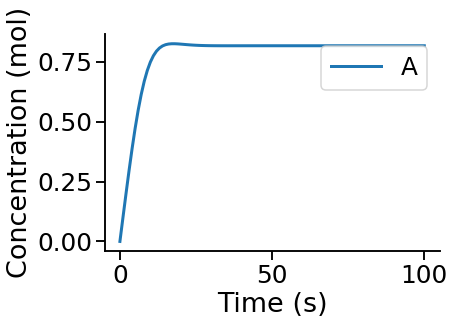

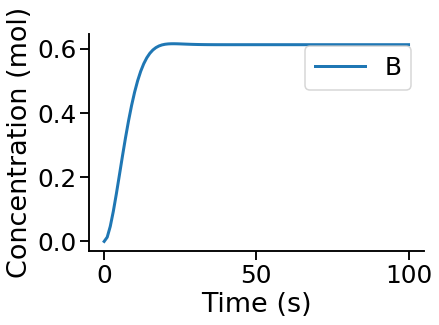

In [16]:
from pycotools3 import viz
viz.PlotTimeCourse(time_course, savefig=True)

More information about running time courses with PyCoTools and Copasi can be found in the `time course tutorial <./Tutorials/Timecourse.ipynb>`_